In [4]:
import numpy as np
import matplotlib.pyplot as plt
import wave
obj = wave.open('ADS-B_SDRSharp_20150526_203031Z_1090000kHz_IQ.wav','r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
x = obj.readframes(10)
obj.close()

Number of channels 2
Sample width 2
Frame rate. 10000000
Number of frames 105742336
parameters: _wave_params(nchannels=2, sampwidth=2, framerate=10000000, nframes=105742336, comptype='NONE', compname='not compressed')


In [5]:
print(x)

b'\x02\x00\xf8\xff\x02\x00\xff\xff\x00\x00\x05\x00\xfc\xff\xfd\xff\xfe\xff\xfd\xff\xfc\xff\x00\x00\xf4\xff\xfd\xff\x00\x00\x00\x00\x04\x00\xff\xff\xf8\xff\xfa\xff'


In [6]:
len(x)

40

In [7]:
print(x.shape)

AttributeError: 'bytes' object has no attribute 'shape'

### scipy.io.wavfile.read(somefile) returns a tuple of two items: the first is the sampling rate in samples per second, the second is a numpy array with all the data read from the file:

In [5]:
from scipy.io import wavfile
samplerate, data = wavfile.read('ADS-B_SDRSharp_20150526_203031Z_1090000kHz_IQ.wav')

In [6]:
print(samplerate)
print(data)

10000000
[[ 2 -8]
 [ 2 -1]
 [ 0  5]
 ...
 [ 0  1]
 [ 4  9]
 [ 2  0]]


In [7]:
print(data.ndim)
print(data.shape)
[M, dummy] = data.shape

2
(105742336, 2)


In [8]:
#print(data[62809999:62810330,0]/2048)
print(np.max(data[62809999:62810330,0]))

1524


In [9]:
z = np.zeros(M, dtype=float)
print(z.shape)
print(data[1,0]/2048.) 
z = np.power(data[0:M,0]/2048.,2)+np.power(data[0:M,1]/2048.,2) # Much faster than the below !
#for i in range(N):
#    z[i]=np.power(data[i][0],2)+np.power(data[i][1],2)

(105742336,)
0.0009765625


In [10]:
z1 = z[62809999:62810330]
N = len(z1)
print(N)
Fs = samplerate
t = np.arange(0,1/Fs*N,1/Fs)
print(len(t))

331
331


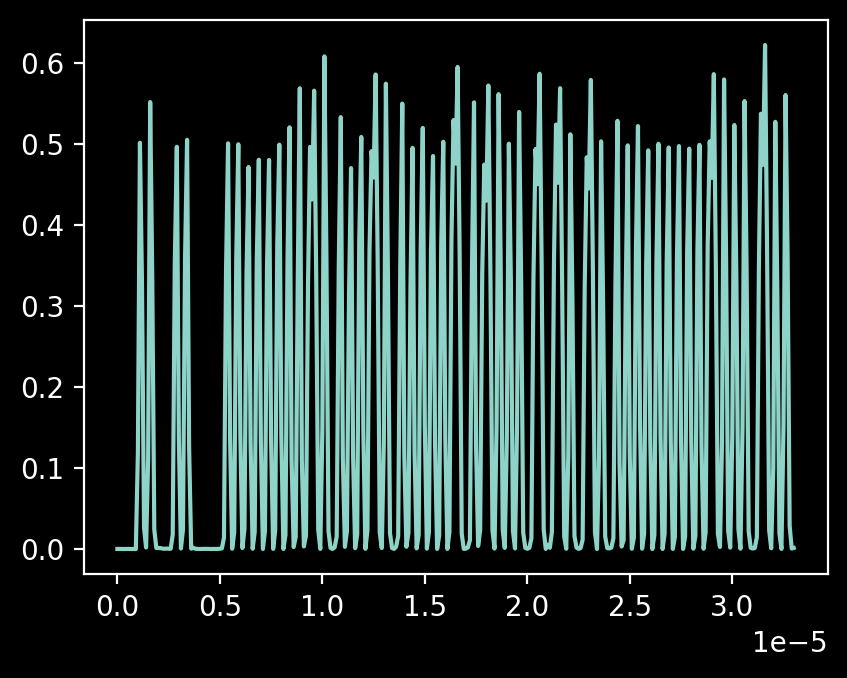

In [11]:
plt.plot(t,z1)

<StemContainer object of 3 artists>

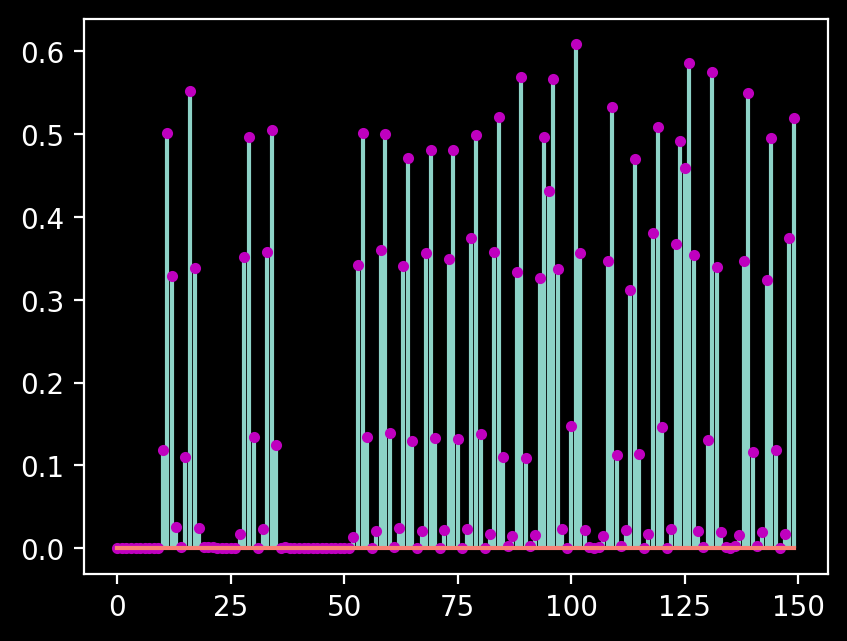

In [12]:
plt.stem(z1[0:150], markerfmt='m.', use_line_collection = True)